In [31]:
import tensorflow as tf
import cv2
from tensorflow import keras
from numpy import asarray, argmax
from matplotlib import pyplot

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
model = tf.keras.models.load_model("/home/jovyan/model/cnn_fashion_enhanced_jupyter_model")

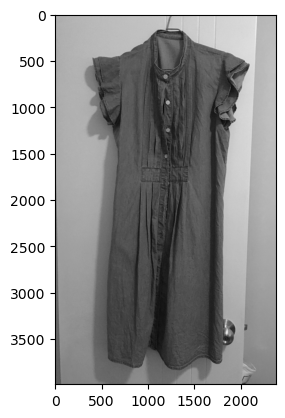

Before preprossing, img.shape =  (3989, 2380)


In [34]:
# Read an external image
img = cv2.imread('/home/jovyan/work/fashion_example.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('Example', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
pyplot.figure()
pyplot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
pyplot.show()
print("Before preprossing, img.shape = ", img.shape)

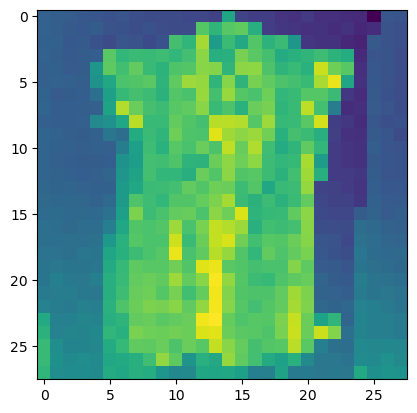

In [35]:
# Resize and negate the image
imgsize = 28
img = cv2.bitwise_not(img)
img = cv2.resize(img, (imgsize, imgsize))
# cv2.imshow('Reduced', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
pyplot.figure()
pyplot.imshow(img)
pyplot.show()

In [36]:
# Reshape the image for the CNN fashion model
img = tf.expand_dims(img, -1)
img = tf.divide(img, 255)
img = tf.reshape(img, [1, imgsize, imgsize, 1])
print("After preprossing, img.shape = ", img.shape)

After preprossing, img.shape =  (1, 28, 28, 1)


In [37]:
# Predict about the image
yhat = model.predict(asarray(img))
print("yhat = ", yhat)
print('Predicted: class = %s' % class_names[argmax(yhat)])

1/1 [==============================] - 0s 63ms/step
yhat =  [[0.08037515 0.04247634 0.01271044 0.04527394 0.17356378 0.00763712
  0.5591378  0.00250493 0.0669767  0.00934372]]
Predicted: class = Shirt
